<a href="https://colab.research.google.com/github/anirudh-bukka/DataAnalysis-SupervisedML/blob/main/k_means_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv("/Users/DELL/Documents/Files_from_d/PROGRAMMING/PYTHON/ML_DS/DATASETS/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


### Scatter plot of Age v/s Income

Text(0, 0.5, 'Income')

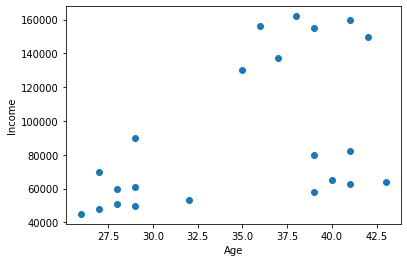

In [ ]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income")

# KMeans classifier

Classifying the data points into 3 groups/clusters, by running the KMeans Algorithm.

In [ ]:
# Instantiate the KMeans object.
km = KMeans(n_clusters = 3)

y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

Append the `'cluster'` column to the dataframe.

In [ ]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


### Scatter plot categorizing data points based on the clusters

#### `.cluster_centers_`:

`.cluster_centers_`, is the arithmetic mean of all the points belonging to the cluster.

In [ ]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

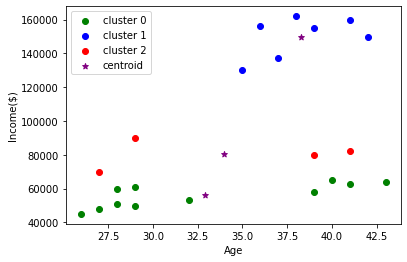

In [ ]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

plt.scatter(df0.Age, df0['Income($)'], color = 'green', label='cluster 0')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue', label='cluster 1')
plt.scatter(df2.Age, df2['Income($)'], color = 'red', label='cluster 2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.show()

In the above scatter plot, the red and green clusters seem incorrect. <br>
<br>
Probably because the scaling might not be right. <br>
- The range of values on y-axis is very high.
- But the range of values on x-axis is very narrow. <br>
<br>
Hence, we normalize the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['Income($)'] = scaler.fit_transform(df[['Income($)']])
# df['Income($)'] = scaler.transform(df[['Income($)']])

df['Age'] = scaler.fit_transform(df[['Age']])
# df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


The above shows dataframe shows: <br>
- `'Age'` column is scaled to values between 0 & 1, <br>
- `'Income($)'` columns is scaled to values between 0 and 1.
<br> 
Hence the values are now comparable.

### Apply KMeans function again
To get a better classification result.

In [ ]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

psst, compare this one with the first predicted clusters XD.<br>
<br>
Now replace the `'clusters'` column in the dataframe.

In [ ]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


### Plot the scatter plot with data points in the new clusters.

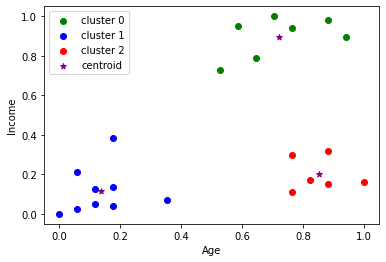

In [ ]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

plt.scatter(df0.Age, df0['Income($)'], color = 'green', label = 'cluster 0')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue', label = 'cluster 1')
plt.scatter(df2.Age, df2['Income($)'], color = 'red', label = 'cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', color = 'purple', label = 'centroid')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

This scatter plot shows that the data points are clustered better.

In [ ]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


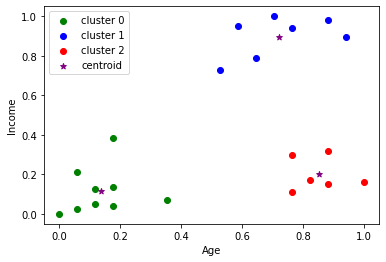

In [ ]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

plt.scatter(df0.Age, df0['Income($)'], color = 'green', label = 'cluster 0')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue', label = 'cluster 1')
plt.scatter(df2.Age, df2['Income($)'], color = 'red', label = 'cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', color = 'purple', label = 'centroid')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

**Now we see that the clustering does not change. Hence 3 is the best value for K**

## Calculate and Plot SSE
SSE: Sum of Square Error

In [ ]:
# First create a range of integers in an interval. These integers are the 'k' values.
k_range = range(1, 10)

# Create an empty list that holds the SSE values for each 'k' value.
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_) # .inertia_ gives SSE value for each 'k' value.

sse

[5.434011511988177,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2621792762345213,
 0.22020960864009395,
 0.16858512236029755,
 0.139888452061285,
 0.10188787724979426]

## Plot SSE vs K values

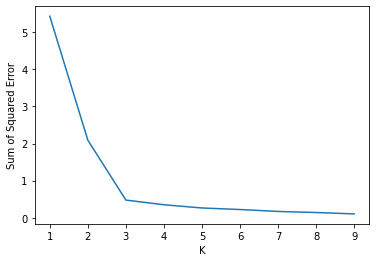

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)

**Here `k` = 3 is the elbow point, which is the best `'k'` value.**